<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.670726,82.662031,-0.071731,178.261025,178.383099,-0.122074
1,0.0,1.0,59.786698,81.460014,-0.308578,150.938134,151.174646,-0.236513
2,0.0,2.0,38.418986,70.019121,0.051121,118.489228,118.306545,0.182683
3,0.0,3.0,24.301094,32.079774,-0.176161,66.204708,66.330816,-0.126108
4,0.0,4.0,28.016479,88.296542,-0.134691,126.178329,126.057656,0.120673
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,51.261676,53.045968,0.439427,114.747071,114.353365,0.393706
29996,999.0,26.0,35.699015,33.216019,0.375122,79.290156,78.929523,0.360633
29997,999.0,27.0,89.731141,59.137129,0.239375,159.107645,158.924791,0.182853
29998,999.0,28.0,46.072661,30.154335,-0.270253,85.956743,86.237121,-0.280377


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    85.670726  82.662031 -0.071731  178.261025  178.383099 -0.122074
      1.0    59.786698  81.460014 -0.308578  150.938134  151.174646 -0.236513
      2.0    38.418986  70.019121  0.051121  118.489228  118.306545  0.182683
      3.0    24.301094  32.079774 -0.176161   66.204708   66.330816 -0.126108
      4.0    28.016479  88.296542 -0.134691  126.178329  126.057656  0.120673
...                ...        ...       ...         ...         ...       ...
999.0 25.0   51.261676  53.045968  0.439427  114.747071  114.353365  0.393706
      26.0   35.699015  33.216019  0.375122   79.290156   78.929523  0.360633
      27.0   89.731141  59.137129  0.239375  159.107645  158.924791  0.182853
      28.0   46.072661  30.154335 -0.270253   85.956743   86.237121 -0.280377
      29.0   55.967060  85.434757 -0.088317  151.313500  151.497809 -0.184310

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    85.670726  82.662031 -0.071731  178.261025  178.383099 -0.122074
      1.0    59.786698  81.460014 -0.308578  150.938134  151.174646 -0.236513
      2.0    38.418986  70.019121  0.051121  118.489228  118.306545  0.182683
      3.0    24.301094  32.079774 -0.176161   66.204708   66.330816 -0.126108
      4.0    28.016479  88.296542 -0.134691  126.178329  126.057656  0.120673
...                ...        ...       ...         ...         ...       ...
999.0 25.0   51.261676  53.045968  0.439427  114.747071  114.353365  0.393706
      26.0   35.699015  33.216019  0.375122   79.290156   78.929523  0.360633
      27.0   89.731141  59.137129  0.239375  159.107645  158.924791  0.182853
      28.0   46.072661  30.154335 -0.270253   85.956743   86.237121 -0.280377
      29.0   55.967060  85.434757 -0.088317  151.313500  151.497809 -0.184310

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.670726,82.662031,-0.071731,178.261025,178.383099,-0.122074
1,0.0,1.0,59.786698,81.460014,-0.308578,150.938134,151.174646,-0.236513
2,0.0,2.0,38.418986,70.019121,0.051121,118.489228,118.306545,0.182683
3,0.0,3.0,24.301094,32.079774,-0.176161,66.204708,66.330816,-0.126108
4,0.0,4.0,28.016479,88.296542,-0.134691,126.178329,126.057656,0.120673
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,51.261676,53.045968,0.439427,114.747071,114.353365,0.393706
29996,999.0,26.0,35.699015,33.216019,0.375122,79.290156,78.929523,0.360633
29997,999.0,27.0,89.731141,59.137129,0.239375,159.107645,158.924791,0.182853
29998,999.0,28.0,46.072661,30.154335,-0.270253,85.956743,86.237121,-0.280377


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    85.670726  82.662031 -0.071731  178.261025  178.383099 -0.122074
      1.0    59.786698  81.460014 -0.308578  150.938134  151.174646 -0.236513
      2.0    38.418986  70.019121  0.051121  118.489228  118.306545  0.182683
      3.0    24.301094  32.079774 -0.176161   66.204708   66.330816 -0.126108
      4.0    28.016479  88.296542 -0.134691  126.178329  126.057656  0.120673
...                ...        ...       ...         ...         ...       ...
999.0 25.0   51.261676  53.045968  0.439427  114.747071  114.353365  0.393706
      26.0   35.699015  33.216019  0.375122   79.290156   78.929523  0.360633
      27.0   89.731141  59.137129  0.239375  159.107645  158.924791  0.182853
      28.0   46.072661  30.154335 -0.270253   85.956743   86.237121 -0.280377
      29.0   55.967060  85.434757 -0.088317  151.313500  151.497809 -0.184310

[30000 rows x 6 columns]

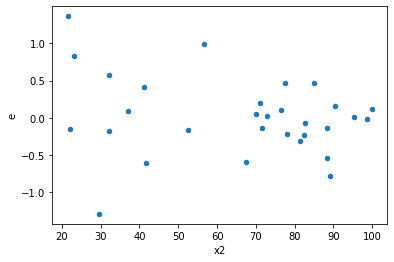

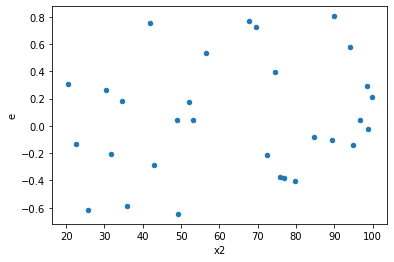

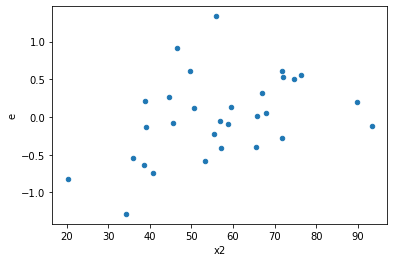

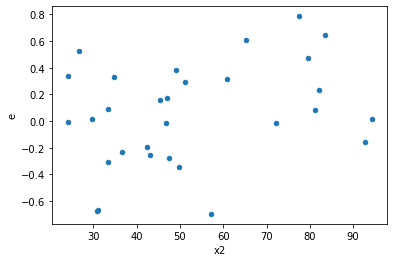

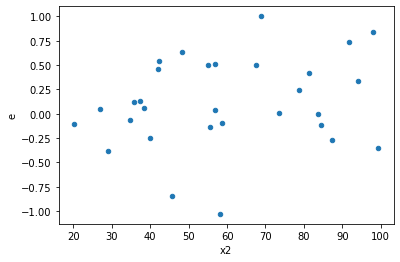

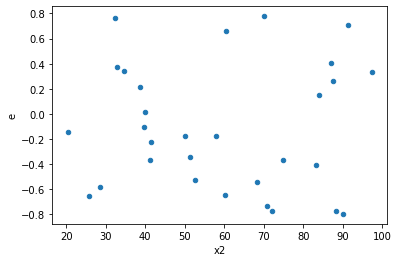

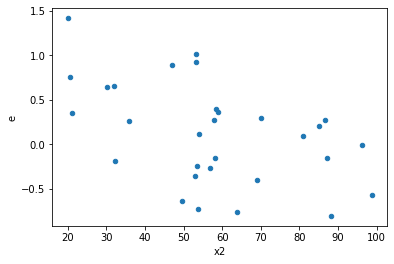

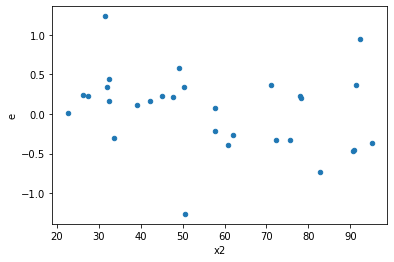

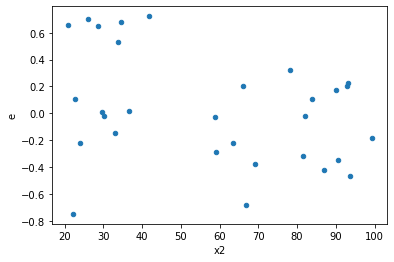

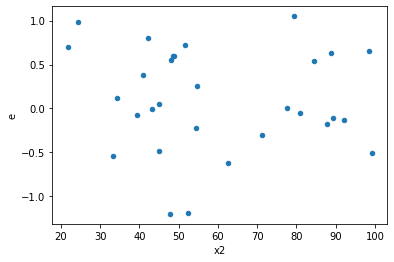

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,13.0,13.0,2.2618069784608545,4.859241065938416,0.1739851521892965,0.3737877743029551,2.148388926293392,0.1813063631839873,0.9093468184080064,0.09065318159199365,Reject005=1 : Homoscedasticity
1.0,19.0,7.0,3.387952305593161,1.4361785523975303,0.1783132792417453,0.2051683646282186,1.1506061999457986,0.9045571737474642,0.5477214131262679,0.4522785868737321,Reject005=1 : Homoscedasticity
3.0,14.0,12.0,1.8702813420618878,1.7375124723174977,0.133591524432992,0.14479270602645813,1.0838464988030325,0.8986363021063837,0.5506818489468082,0.44931815105319184,Reject005=1 : Homoscedasticity
4.0,6.0,20.0,0.9639669955381216,3.727232403110552,0.16066116592302027,0.1863616201555276,1.159966810180013,0.7316764420241764,0.6341617789879118,0.3658382210120882,Reject005=1 : Homoscedasticity
6.0,10.0,16.0,1.9084459870609527,4.630756129925845,0.19084459870609527,0.2894222581203653,1.5165336618516605,0.44154560576926616,0.7792271971153669,0.22077280288463308,Reject005=1 : Homoscedasticity
8.0,22.0,4.0,2.476998608561741,0.740398236457483,0.1125908458437155,0.18509955911437076,1.644001852258067,0.6781437073509724,0.6609281463245138,0.3390718536754862,Reject005=1 : Homoscedasticity
13.0,12.0,14.0,1.2301418910272606,4.353265948485887,0.10251182425227172,0.3109475677489919,3.033284891933831,0.05110331094436171,0.9744483445278191,0.025551655472180856,Reject005=1 : Homoscedasticity
16.0,17.0,9.0,2.9097599844389097,1.621987302508754,0.17116235202581823,0.18022081138986154,1.052923199855754,0.9792364252586989,0.5103817873706505,0.48961821262934946,Reject005=1 : Homoscedasticity
18.0,7.0,19.0,0.37865268888602915,4.455469689322228,0.05409324126943273,0.23449840470116987,4.335077713926552,0.010113771682281225,0.9949431141588594,0.005056885841140613,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,13.0,2.2618069784608545,4.859241065938416,0.1739851521892965,0.3737877743029551,2.148388926293392,0.1813063631839873,Reject005=1 : Homoscedasticity
1.0,19.0,7.0,3.387952305593161,1.4361785523975303,0.1783132792417453,0.2051683646282186,1.1506061999457986,0.9045571737474642,Reject005=1 : Homoscedasticity
2.0,14.0,12.0,4.227886793045849,2.034799804731587,0.3019919137889892,0.16956665039429894,0.5614940091170131,0.30179391128043925,Reject005=1 : Homoscedasticity
3.0,14.0,12.0,1.8702813420618878,1.7375124723174977,0.133591524432992,0.14479270602645813,1.0838464988030325,0.8986363021063837,Reject005=1 : Homoscedasticity
4.0,6.0,20.0,0.9639669955381216,3.727232403110552,0.16066116592302027,0.1863616201555276,1.159966810180013,0.7316764420241764,Reject005=1 : Homoscedasticity
5.0,10.0,16.0,3.3441486408488608,3.2397597859065685,0.3344148640848861,0.20248498661916053,0.605490390426434,0.42453756917611946,Reject005=1 : Homoscedasticity
6.0,10.0,16.0,1.9084459870609527,4.630756129925845,0.19084459870609527,0.2894222581203653,1.5165336618516605,0.44154560576926616,Reject005=1 : Homoscedasticity
7.0,14.0,12.0,3.639702250924443,1.9215305417425959,0.2599787322088888,0.16012754514521632,0.6159255558510701,0.3842648476316468,Reject005=1 : Homoscedasticity
8.0,22.0,4.0,2.476998608561741,0.740398236457483,0.1125908458437155,0.18509955911437076,1.644001852258067,0.6781437073509724,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      899
Reject005=0 : Heteroscedasticity    101
Name: Result_test, dtype: int64